<a href="https://colab.research.google.com/github/Dxsonu7/Heart-Watcher/blob/main/Heartwatcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data
data = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
encode=LabelEncoder()

data['GenHealth']=encode.fit_transform(data['GenHealth'])
data['Race']=encode.fit_transform(data['Race'])


In [ ]:
for col in data.columns:
    data[col] = data[col].replace('Yes',1)
    data[col] = data[col].replace('No',0)
    data[col] = data[col].replace('Male',1)
    data[col] = data[col].replace('Female',0)
    data[col] = data[col].replace('No, borderline diabetes',0)
    data[col] = data[col].replace('Yes (during pregnancy)',1)
    data[col] = data[col].replace('55-59',55)
    data[col] = data[col].replace('80 or older',80)
    data[col] = data[col].replace('65-69',65)
    data[col] = data[col].replace('75-79',75)
    data[col] = data[col].replace('40-44',40)
    data[col] = data[col].replace('70-74',70)
    data[col] = data[col].replace('60-64',60)
    data[col] = data[col].replace('50-54',50)
    data[col] = data[col].replace('45-49',45)
    data[col] = data[col].replace('18-24',18)
    data[col] = data[col].replace('35-39',35)
    data[col] = data[col].replace('30-34',30)
    data[col] = data[col].replace('25-29',25)
    data[col] = data[col].astype(int)

<ipython-input-6-db6548689ac0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace('No',0)
<ipython-input-6-db6548689ac0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace('No',0)
<ipython-input-6-db6548689ac0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16,1,0,0,3,30,0,0,55,5,1,1,4,5,1,0,1
1,0,20,0,0,1,0,0,0,0,80,5,0,1,4,7,0,0,0
2,0,26,1,0,0,20,30,0,1,65,5,1,1,1,8,1,0,0
3,0,24,0,0,0,0,0,0,0,75,5,0,0,2,6,0,0,1
4,0,23,0,0,0,28,0,1,0,40,5,0,1,4,8,0,0,0


In [ ]:
df_encoded = pd.get_dummies(data, drop_first=True)

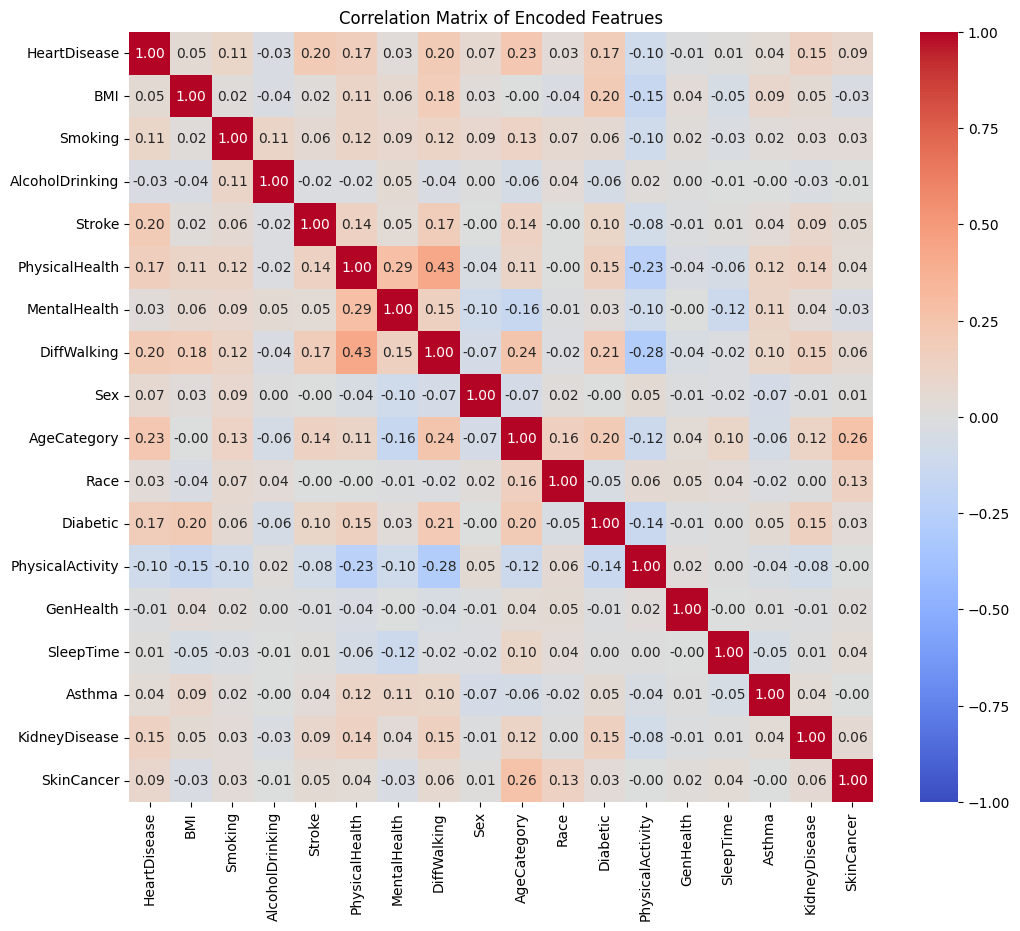

In [ ]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Encoded Featrues')
plt.show()